In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement_dataset.csv')

In [4]:
df.head()

,cgpa,iq,placed
0,0.080115,1.004458,-0.996451
1,-0.285810,1.234762,-0.996451
2,1.535831,-0.459795,1.003562
3,-0.548485,1.496507,-0.996451
4,-0.536805,-0.008369,1.003562


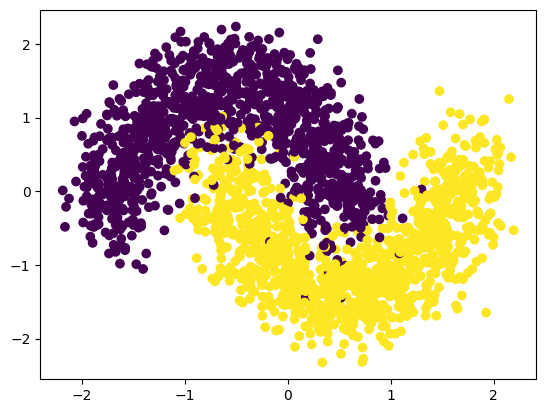

In [6]:
plt.scatter(x=df['cgpa'],y=df['iq'],c=df['placed'])

In [7]:
X = df.iloc[:1000,0:2].values
y = df.iloc[:1000,-1].values

In [8]:
X

array([[ 0.08011522,  1.0044578 ],
       [-0.28580958,  1.23476247],
       [ 1.53583096, -0.45979482],
       ...,
       [ 0.51800042,  0.22557125],
       [-0.02859575,  0.95283478],
       [ 0.22603039, -0.28354369]], shape=(1000, 2))

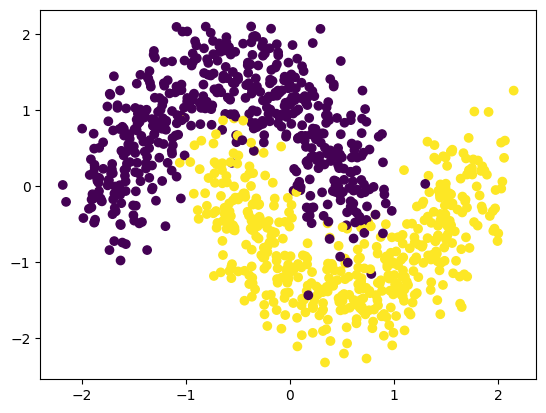

In [9]:
plt.scatter(x=X[:,0],y=X[:,-1],c=y[:])

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [11]:
from keras.layers import Input

In [12]:
model = Sequential([
     Input(shape=(2,)),
     Dense(2,activation='relu'),
     Dense(2,activation='relu'),
     Dense(1,activation='sigmoid')
])
         
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0000e+00 - loss: 0.6641 - val_accuracy: 0.0000e+00 - val_loss: 0.6467
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.6142 - val_accuracy: 0.0000e+00 - val_loss: 0.6024
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.5597 - val_accuracy: 0.0000e+00 - val_loss: 0.5522
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.4982 - val_accuracy: 0.0000e+00 - val_loss: 0.4977
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.4318 - val_accuracy: 0.0000e+00 - val_loss: 0.4368
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.3579 - val_accuracy: 0.0000e+00 - val_loss: 0.3728
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.2814 - val_accuracy: 0.0000e+00 - val_loss: 0.3012
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - a

In [14]:
model2 = Sequential([
     Input(shape=(2,)),
     Dense(3,activation='relu'),
     BatchNormalization(),
     Dense(2,activation='relu'),
     BatchNormalization(),
     Dense(1,activation='sigmoid')
])
         
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [15]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.0000e+00 - loss: 0.2732 - val_accuracy: 0.0000e+00 - val_loss: 0.5804
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.1929 - val_accuracy: 0.0000e+00 - val_loss: 0.5156
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.1176 - val_accuracy: 0.0000e+00 - val_loss: 0.4545
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0654 - val_accuracy: 0.0000e+00 - val_loss: 0.3989
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -0.0348 - val_accuracy: 0.0000e+00 - val_loss: 0.3432
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -0.1121 - val_accuracy: 0.0000e+00 - val_loss: 0.2877
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -0.1898 - val_accuracy: 0.0000e+00 - val_loss: 0.2208
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

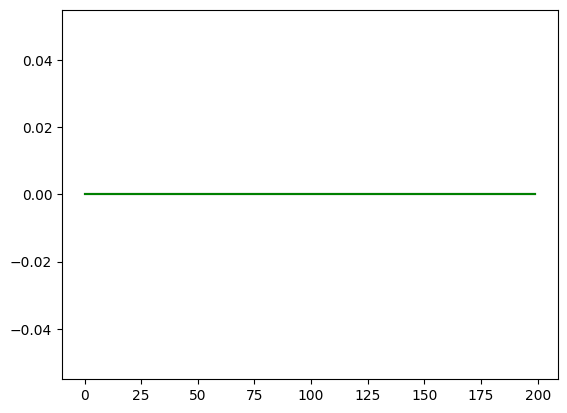

In [16]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

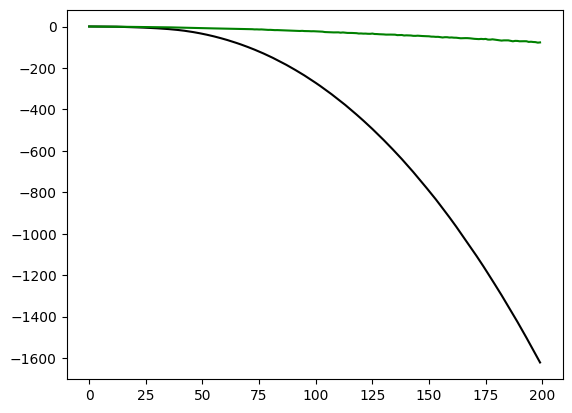

In [17]:
plt.plot(history1.history['val_loss'],color='black')
plt.plot(history2.history['val_loss'],color='green')